### Integrantes

Rafael Augusto Monteiro - 9293095  
William Quelho Ferreira - 9293421

# Exploração dos dados - Parte VII

Datasets selecionado:
* Titanic

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [18]:
# Uso esse comando e o comando acima pois uso um tema de backgroudn escuro no meu jupyter.
plt.style.use('default')

In [3]:
path = "train.csv"

df = pd.read_csv(path)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Perceptron

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

def classificacao(data, columns, target, score=accuracy_score, score_name='acurácia', 
                  folds=10, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados e as medidas de desempenho
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    #svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'dt', '3nn', '5nn', '7nn']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}

### Perguntas

1. Realizar 10-fold Cross-Validation nos algoritmos da prática passada utilizando as métricas vista na aula de hoje (acuácia, precisão, revocação, sensitividade, especificidade, medida-F e média harmônica). Comentar se no seu cenário alguma dessa medidas apresentou algum problema.
2. Escolha dois classificadores e plot a curva ROC e calcule a AUC para os mesmos.
3. Explique o desempenho dos classificadores que você treinou na questão anterior pela curva ROC. Como a AUC sintetiza a curva ROC e como podemos utilizá-la para comparar classificadores?

### Respostas

### 1.

Para essa prática, serão utilizados os atributos Pclass, Age, Sibsp e Parch para predizer a classe Survived (se o passageiro sobreviveu ou não). 

In [5]:
from sklearn.metrics import confusion_matrix
# Separando atributos relevantes
selected = df.iloc[:,[1,2,5,6,7]]
selected.dropna(inplace=True)

# Realizando a classificação
# Utilizamos a função confusion_matrix do sklearn como score para calcularmos as métricas na próxima célula
res = classificacao(selected, range(1,len(selected.columns)), 0, score=confusion_matrix, score_name='False Positive Rate',folds=10, plot=False)

In [66]:
def accuracy(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    return (tn + tp) / np.sum(conf_matrix)

def precision(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    return tp / (tp + fp)

def recall(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    return tp / (tp + fn)

def sensitivity(conf_matrix):
    # Para classificação binaria, sensitividade é igual ao recall
    return recall(conf_matrix)

def specificity(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    return tn / (tn + fp)

def f1(conf_matrix):
    prec, rec = precision(conf_matrix), recall(conf_matrix)
    return 2 * (prec * rec) / (prec + rec)

metrics = [accuracy, precision, recall, sensitivity, specificity, f1]

In [69]:
# Criando um dicionario com todas as metricas calculadas
# res_metrics = { c_name:{ metric.__name__:metric(sum(res['results'][c_name])) for metric in metrics } for c_name in res['results'] }
res_metrics = {}
for c_name in res['results']:
    res_metrics[c_name] = {}
    for metric in metrics:
        res_metrics[c_name][metric.__name__] = metric(sum(res['results'][c_name]))

pd.DataFrame(res_metrics)

,perceptron,dt,3nn,5nn,7nn
accuracy,0.523810,0.711485,0.687675,0.670868,0.663866
f1,0.507246,0.614232,0.596745,0.552381,0.534884
precision,0.437500,0.672131,0.627376,0.617021,0.610619
recall,0.603448,0.565517,0.568966,0.500000,0.475862
sensitivity,0.603448,0.565517,0.568966,0.500000,0.475862
specificity,0.469340,0.811321,0.768868,0.787736,0.792453


O cálculo das métricas funcionou corretamente para todos os casos, dado que pré processamos os dados (retiramos NaNs e selecionamos apenas colunas válidas para a classificação)

## 2.


In [9]:
# Ferramentas para k-fold CV e ROC - AUC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score

# Função que realiza as classificações e calcula os valores de ROC e AUC
def roc_auc(data, atr_index, class_index, clf):
    
    # coluna com valores verdadeiros
    y_true = data.iloc[:,class_index]
    
    # training dt
    res = {}
    y_score = clf.fit(data.iloc[:,atr_index], data.iloc[:,class_index]).predict_proba(data.iloc[:,atr_index])[:,1]
    res['roc'] = roc_curve(y_true, y_score)
    res['auc'] = roc_auc_score(y_true, y_score)
    return res

In [20]:
# Classificadores usados
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Dividindo dataset em treino e teste
selected = selected.sample(frac=1)
train = selected[:int(len(selected)*0.8)]
test = selected.drop(train.index)

# Inicializando classificadores
dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(train)*0.1))
_7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')

# rodando os classificadores com 10-fold CV e calculando ROC_curve como medida de desempenho
res_dt = roc_auc(train, range(1,len(train.columns)), 0, dt)
res_7nn = roc_auc(train, range(1,len(train.columns)), 0, _7nn)

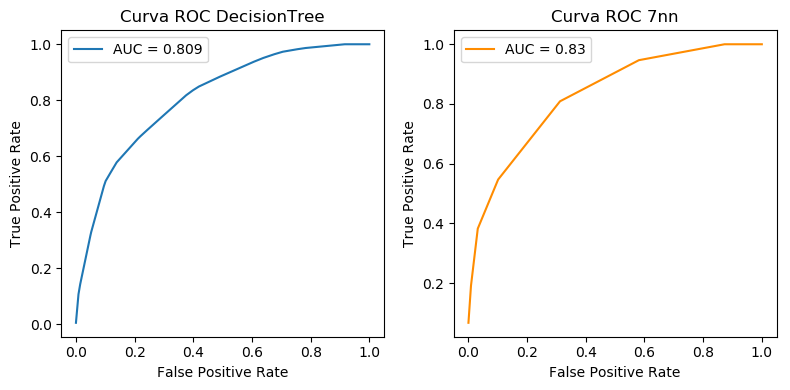

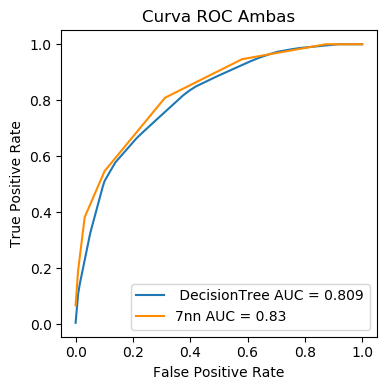

In [68]:
plt.figure(figsize=(8,4))
# Plotando dt
plt.subplot(121)
plt.plot(res_dt['roc'][0], res_dt['roc'][1], label = f'AUC = {res_dt["auc"]:.3}')
plt.title('Curva ROC DecisionTree')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

# Plotando 7nn
plt.subplot(122)
plt.plot(res_7nn['roc'][0], res_7nn['roc'][1], label=f'AUC = {res_7nn["auc"]:.3}', color='darkorange')
plt.title('Curva ROC 7nn')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(4,4))
# Plotando dt
plt.plot(res_dt['roc'][0], res_dt['roc'][1], label=f' DecisionTree AUC = {res_dt["auc"]:.3}')
# Plotando 7nn
plt.plot(res_7nn['roc'][0], res_7nn['roc'][1], label=f'7nn AUC = {res_7nn["auc"]:.3}', color='darkorange')

plt.title('Curva ROC Ambas')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

plt.tight_layout()
plt.show()

## 3.

O uso da curva ROC permite verificar, de acordo com os níveis de confiança de cada classificação, qual o melhor balanço entre a taxa de verdadeiros positivos e falsos positivos. Utilizando a área abaixo da curva, é possível analizar qual classificador apresenta melhor desempenho em geral.

Pela análise feita sobre os gráficos acima, podemos concluir que o classificador 7nn é melhor. Porém, os resultados são bem próximos, já que em várias execuções o desempenho do classificador decision tree esteve próximo de AUC = 0.83, variando entre 0.83 e 0.805